# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment 3: Naive Bayes Classifier

## Learning Objectives

At the end of the experiment, you will be able to

* train and evaluate NaiveBayes classification model
* use toy datasets for binary classification
* Understanding of performance matrices


### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "aias_02" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "7780236595" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M1_AST_03_Naive_Bayes_Classifier_B" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Introduction

The Naive Bayes algorithm operates on the principles of Bayes' theorem, which asserts that the probability of an event is the product of its prior probability and the likelihood of the event given certain evidence. In the context of classification, the goal is to identify the most probable class based on a given set of features or attributes.

One key assumption of Naive Bayes is that the features are independent of each other, implying that the presence or absence of one feature does not influence the presence or absence of another. This assumption simplifies the computation of feature likelihoods, allowing for the calculation of each feature's likelihood independently and subsequently multiplying them together.


![Basic workflow](https://drive.google.com/uc?export=view&id=1-UNLi-SJ0JWN6sfg7DWmxs-WNlgsZgN2)







### Bayes Theorem



Bayes' theorem is a fundamental concept in statistics and probability theory. It allows us to calculate the **conditional probability** of an event occurring, given that we already know another event has occurred. In simpler terms, it helps us **update our belief** about something based on new evidence.

Here's a breakdown of the key components of Bayes' theorem:

**P(A | B):** This represents the **conditional probability** of event A happening, given that event B has already happened. This is what we want to find out.

**P(B | A):** This represents the **likelihood** of event B happening, given that event A has already happened. This is the **evidence** that we are using to update our belief about A.

**P(A):** This represents the **prior probability** of event A happening. This is our initial belief about A, before we consider any evidence.

**P(B):** This represents the **marginal probability** of event B happening. This is the probability of B happening regardless of whether A happens or not.

The formula for Bayes' theorem is:

```
P(A | B) = P(B | A) * P(A) / P(B)
```




Let's consider a simple example of a Naive Bayes classifier for spam email detection. We want to classify emails as either spam or not spam (ham) based on the presence of certain words. We assume we have a training dataset with the following information:

**Spam Emails:**

- Email 1: "Free money now! Click to claim."
- Email 2: "Congratulations, you've won a lottery."

**Ham Emails:**

- Email 3: "Meeting at 10 am tomorrow."
- Email 4: "Please find the attached document for your review."

**Building the Model:**

1. **Calculate Prior Probabilities:**
   \begin{align*}
   P(\text{Spam}) &= \frac{\text{Number of spam emails}}{\text{Total number of emails}} \\
   P(\text{Ham}) &= \frac{\text{Number of ham emails}}{\text{Total number of emails}}
   \end{align*}

2. **Calculate Likelihoods:**
   For each word, calculate $P(\text{Word} | \text{Spam})$ and $P(\text{Word} | \text{Ham})$:
   \begin{align*}
   P(\text{Free} | \text{Spam}) &= \frac{\text{Number of times "Free" appears in spam}}{\text{Total number of words in spam emails}} \\
   P(\text{Free} | \text{Ham}) &= \frac{\text{Number of times "Free" appears in ham}}{\text{Total number of words in ham emails}}
   \end{align*}

   Repeat this process for other words.

### Classification Phase

Now, let's say we receive a new email: "Claim your free gift now!"

**Calculate Posterior Probabilities:**

For each class (spam and ham), calculate the probability of the email belonging to that class using Bayes' theorem:

\begin{align*}
P(\text{Spam} | \text{Email}) &\propto P(\text{Spam}) \times P(\text{Claim} | \text{Spam}) \times P(\text{your} | \text{Spam}) \\
&\quad\times P(\text{free} | \text{Spam}) \times P(\text{gift} | \text{Spam}) \times P(\text{now} | \text{Spam}) \\
P(\text{Ham} | \text{Email}) &\propto P(\text{Ham}) \times P(\text{Claim} | \text{Ham}) \times P(\text{your} | \text{Ham}) \\
&\quad\times P(\text{free} | \text{Ham}) \times P(\text{gift} | \text{Ham}) \times P(\text{now} | \text{Ham})
\end{align*}

**Choose the Class:**

Select the class with the higher posterior probability as the predicted class for the email.

**Simplification and Efficiency:**

Naive Bayes simplifies the classification process by assuming independence between the words, making it computationally efficient and often effective for text classification tasks like spam detection.



#### Importing necessary packages for this assignment.
Lets first import the necessary packages required for this notebook.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Import data

In [ ]:
#@title Download dataset
!gdown "1OZhC3ZAnQUcAkqr1G2ycNa2JqWfNR_-v"
#https://drive.google.com/file/d/1OZhC3ZAnQUcAkqr1G2ycNa2JqWfNR_-v/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1OZhC3ZAnQUcAkqr1G2ycNa2JqWfNR_-v
To: /content/Social_Network_Ads.csv
100% 10.5k/10.5k [00:00<00:00, 24.8MB/s]


In [ ]:
 dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### DATA ANALYSIS

Exploratory Data Analysis (EDA) is a systematic approach to examining and summarizing the fundamental characteristics of a dataset. The primary objective is to gain insights into the inherent structure, relationships, and patterns present in the data. By conducting EDA, one can pinpoint significant features, anomalies, and trends within the dataset, providing valuable information for subsequent analysis and modeling.

The typical EDA process encompasses several essential steps, including:



1.   Data cleaning and preparation, which involves the removal of missing or inaccurate values, transformation of variables, and handling of outliers.
2.   Data visualization, the creation of graphs, charts, and other visual representations to discern patterns, relationships, and anomalies in the data.
3. Statistical analysis, wherein mathematical and statistical methods are applied to identify noteworthy features and relationships within the dataset.

4. Preprocessing, a step focused on preparing the data in a manner conducive to effective analysis and modeling, while also addressing any biases or errors that might impact the results.

#### Get required data

In [ ]:
# Get required data
dataset.drop(columns = ['User ID'], inplace=True)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


#### Describe

In [ ]:
# Describe data
# YOUR CODE HERE

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### Distribution

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

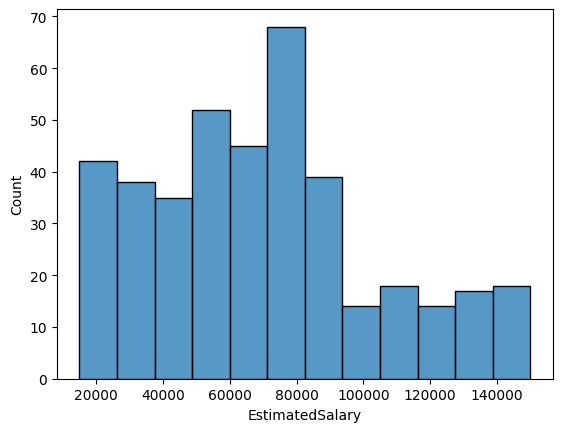

In [ ]:
# Salary distribution
# YOUR CODE HERE

#### Label encoding

Label encoding serves as a preprocessing method in machine learning and data analysis, transforming categorical data into numerical values to facilitate compatibility with mathematical operations and models.

In this technique, categorical data is mapped to integer values, usually commencing from 0. Each distinct category in the dataset is assigned a unique integer value, allowing the categorical data to be treated as numerical data.

In [ ]:
# Label encoding
# YOUR CODE HERE
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### Correlation Matrix


A correlation matrix is a tabular representation summarizing the connections among various variables in a dataset. It displays the correlation coefficients between each pair of variables, offering insights into the strength and direction of their relationships. This tool proves valuable in pinpointing highly correlated variables and assisting in the selection of a subset of variables for more in-depth analysis.

The correlation coefficient, ranging from -1 to 1, signifies the nature of the relationship between two variables as follows:

* A correlation coefficient of -1 denotes a robust negative relationship between the two variables.
* A correlation coefficient of 0 indicates no discernible relationship between the two variables.
* A correlation coefficient of 1 signifies a robust positive relationship between the two variables.

<Axes: >

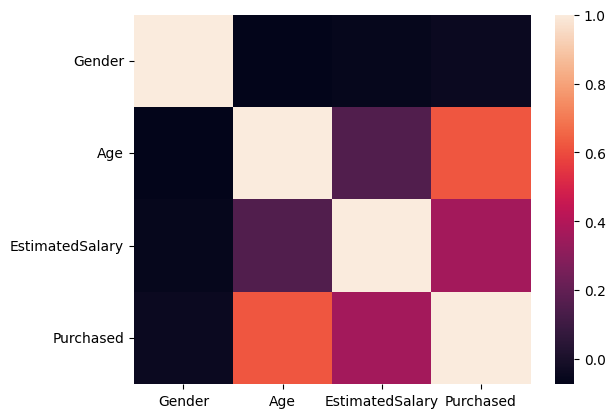

In [ ]:
# Correlation matrix
# YOUR CODE HERE

#### Drop insignificant data

In [ ]:
# Drop Gender column
# YOUR CODE HERE
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Split data


The process of segregating data into independent and dependent variables entails isolating the input features (independent variables) from the target variable (dependent variable). These independent variables play a crucial role in predicting the value of the dependent variable.

Subsequently, the data undergoes division into a training set and a test set. The training set is employed for model fitting, while the test set serves as the means to assess the model's performance

#### Independent/Dependent variables

In [ ]:
# Split data into independent/dependent variables
# YOUR CODE HERE

#### Train/Test sets

In [ ]:
# Split data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

#### Feature scaling


Feature scaling is a technique employed to adjust the values of numeric variables, ensuring they share a common scale, given that machine learning algorithms are sensitive to the scale of input features.

Two widely used methods for feature scaling include normalization and standardization.

* **Normalization** involves scaling variable values to a range between 0 and 1. This is achieved by subtracting the minimum value of the feature and dividing it by the range (max-min).

* **Standardization**, on the other hand, transforms variable values to have a mean of 0 and a standard deviation of 1. This process involves subtracting the mean and dividing it by the standard deviation.

Typically conducted prior to model training, feature scaling enhances model performance, reduces training time, and prevents algorithmic bias towards variables with larger values.

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train model

The process of training a machine learning model entails utilizing a training dataset to approximate the model's parameters. During this training phase, a learning algorithm is employed, iteratively adjusting the model parameters. This adjustment is carried out to minimize a loss function, which gauges the disparity between predicted values and actual values in the training data. The ultimate goal is to enhance the accuracy of the model.


To train the Naïve Bayes classifier model with our training data, input the X_train and y_train data into the model using classifier.fit. This step initiates the training process and allows the model to learn from the provided training data.

In [ ]:
# Train Bayes-Theorem model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Prediction of Dependent Variable


Once the likelihood of the features for each class is calculated, the algorithm multiplies the likelihood by the prior probability of each class, which is estimated from the training data. The class with the highest probability is then selected as the predicted class.

The accuracy of the model can be evaluated on a test set, which was previously held out from the training process.

In [ ]:
# Prediction
# YOUR CODE HERE

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


### Evaluate model

#### Accuracy

In [ ]:
# Accuracy
# YOUR CODE HERE

0.86

#### Classification report

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



#### F1 score

In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8333333333333334


#### Confusion matrix

<Axes: >

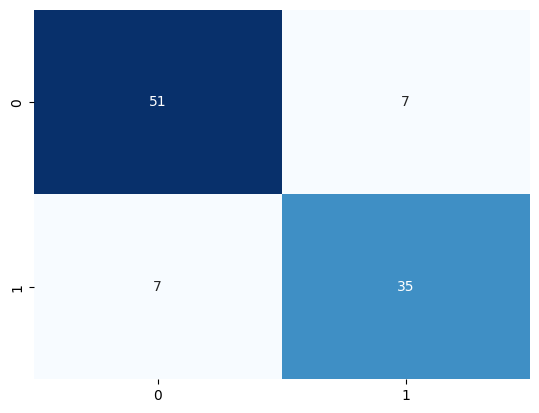

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

### Visualize predictions

#### Prediction on training set

<ipython-input-58-bbbaf9601182>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)


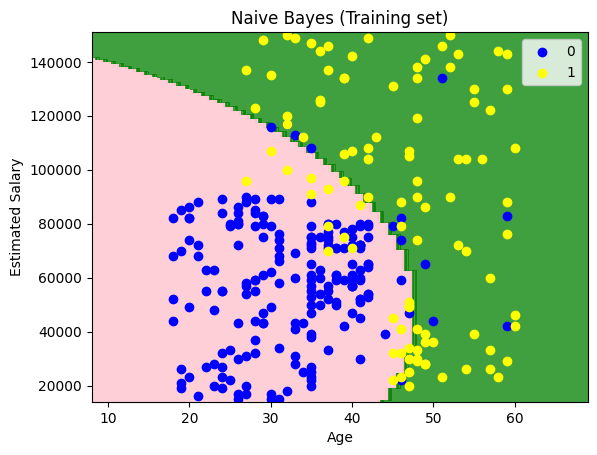

In [ ]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Prediction on test set

<ipython-input-59-2c02a7933fb5>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)


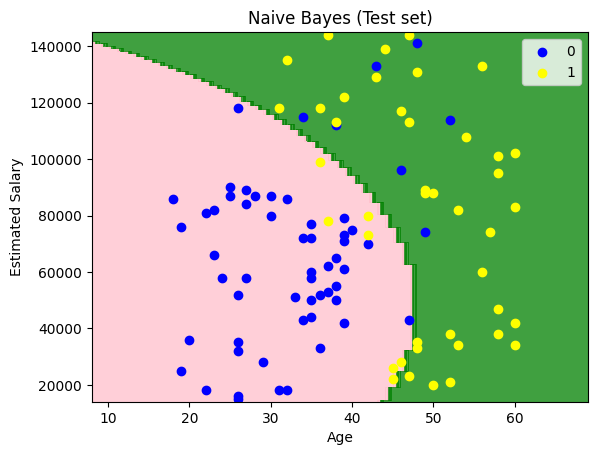

In [ ]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Please answer the questions below to complete the experiment:




In [ ]:
# @title Naive bayes classifier is a Machine Learning algorithm that is used to predict the probability of a ___. { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["","categorical independent variable","categorical dependent variable", "numerical dependent variable", "numerical independent variable"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 141
Date of submission:  07 Dec 2023
Time of submission:  14:26:38
View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions
